<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/kalman/Signals_to_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 12.0 MB/s 
     |████████████████████████████████| 6.4 MB 23.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

In [3]:
tker = '^nsei' #'^nsei'
START_testing='2020-09-01'

In [4]:
df=yf.download(tker,start=START_testing)

[*********************100%***********************]  1 of 1 completed


In [5]:
rapida = 18*1.2
lenta = 26*1.2
stdv =1.8
df['fast'] =df['Close'].ewm(span=rapida).mean()
df['slow'] =df['Close'].ewm(span=lenta).mean()
df['bband']= df['fast']-df['slow']
df['avg'] = df['bband'].rolling(window=10).mean()
df['Sdev'] = df['bband'].rolling(window=12).std()
df['Upper Band'] = df['avg'] + (df['Sdev'] *stdv)
df['Lower Band'] = df['avg'] - (df['Sdev'] *stdv)
df['spread'] = df['bband'] - df['Lower Band']
df['spread_1'] = -(df['bband'] - df['Upper Band'])

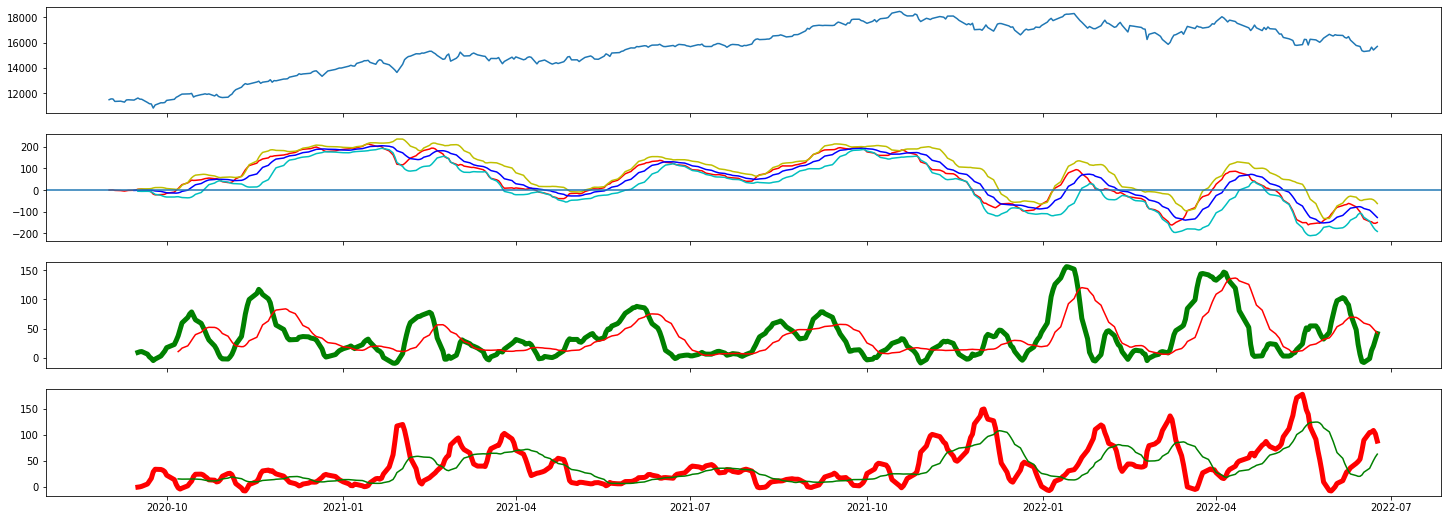

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,1, figsize=(25,9),sharex=True)
ax[0].plot(df.loc[:, :].index, df.loc[:, 'Close'])
ax[1].plot(df[['bband']][:],color='r')
ax[1].plot(df[['avg',]][:],color='b')
ax[1].plot(df[['Upper Band',]][:],color='y')
ax[1].plot(df[['Lower Band']][:],color='c')
ax[1].axhline(y=0)
ax[2].plot(df[['spread']][:],color='g',linewidth=5)
ax[2].plot(df[['spread']][:].rolling(window=15).mean(),color='r')
ax[3].plot(df[['spread_1']][:],color='r',linewidth=5)
ax[3].plot(df[['spread_1']][:].rolling(window=15).mean(),color='g')
#ax[2].legend('BUY Signal')
#ax[2].legend(loc='upper left')
#ax[3].legend(loc='upper left')
#ax[3].legend('SELL Signal')
plt.show()